In [ ]:
import pandas as pd

In [ ]:
# link of GMS spawn rates for each map
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5lCPppCU8Mc10n21X26twPaN6npLU_wqnYuBomtQyRysjlALs5_qcDV0RtLSIVOlHwGTGV1Cxq62Y/pubhtml?gid=808696499#"

In [ ]:
# load html into data frame
html = pd.read_html(link)[1]
table = html[5:].drop(['Unnamed: 0'], axis=1)
df = pd.DataFrame(table.values.tolist()[1:], columns=table.values.tolist()[0])
df['W(1/100)'] = df['W(1/100)'].astype(int)
df['H(1/100)'] = df['H(1/100)'].astype(int)
df['Avg.LV'] = df['Avg.LV'].astype(int)
df['Cap/Gen'] = df['Cap/Gen'].astype(int)

# create new column for zone
df.insert(loc=0, column='Zone', value="")

In [ ]:
# dataframe after scraping
df

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Capacity,SP,Avg.LV,Avg.HP,Avg.Exp,Avg.Exp/Gen,Monsters,Limit Portal,Teleport Limit
0,,Carcion : Breathtaking Cave 2,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
1,,Carcion : Breathtaking Cave 3,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
2,,Carcion : Breathtaking Cave 4,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
3,,Carcion : Sunken Ruins 2,32,10,39,39,40,289,21843743620,4265489,166354071,Priest of the Source x40,0,0
4,,Carcion : Sunken Ruins 3,32,10,39,39,40,289,21843743620,4265489,166354071,Priest of the Source x40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,,Coco Island : Starfish Beach 2,17,7,8,8,14,1,15,3,24,Starfish x14,1,1
1573,,Coco Island : Coco Island Beach,17,8,8,8,14,1,15,3,24,Starfish x14,1,1
1574,,Maple Road : Inside the Small Forest,14,4,6,6,8,1,15,3,18,Snail x8,0,1
1575,,Maple Road : Snail Park,14,5,6,6,8,1,15,3,18,Snail x8,0,1


In [ ]:
glossary = {"W(1/100)/H(1/100)": "1 / 100 scaled map width/height.",
            "Cap/Gen" : "The maximum number of monsters that can appear on the field per cycle.",
            "Capacity": "The maximum number of monsters that can appear on the field. It is basically proportional to the size of the map, but it does not exceed 40 due to restrictions.",
            "Spawn Point(SP)": "The number of area where monsters appear. Spawn Point can summon a monster per generation cycle if there's no monsters around it, however, the total number of monsters spawnable does not over the 'Capacity'.",
            "Avg.LV/HP/Exp": "The average level/hp/exp of monsters appearing on the map, however, resummoned monsters (like exp 0 monsters that transform to another monster after dead) and monsters that have cooltime to respawn is not considered."
            }
glossary

{'W(1/100)/H(1/100)': '1 / 100 scaled map width/height.',
 'Cap/Gen': 'The maximum number of monsters that can appear on the field per cycle.',
 'Capacity': 'The maximum number of monsters that can appear on the field. It is basically proportional to the size of the map, but it does not exceed 40 due to restrictions.',
 'Spawn Point(SP)': "The number of area where monsters appear. Spawn Point can summon a monster per generation cycle if there's no monsters around it, however, the total number of monsters spawnable does not over the 'Capacity'.",
 'Avg.LV/HP/Exp': 'The average level/hp/exp of monsters appearing on the map, however, resummoned monsters (like exp 0 monsters that transform to another monster after dead) and monsters that have cooltime to respawn is not considered.'}

In [ ]:
# split the region/zone and map name
def extract_zone(map_name):
  split_str = map_name.split(" : ")
  if len(split_str) == 2:
    zone, map = split_str
  else:
    map = split_str
    zone = ""

  return zone, map

df['Zone'], df['Map Name'] = zip(*df['Map Name'].map(extract_zone))

In [ ]:
# dataframe after separating zone and map name
df

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Capacity,SP,Avg.LV,Avg.HP,Avg.Exp,Avg.Exp/Gen,Monsters,Limit Portal,Teleport Limit
0,Carcion,Breathtaking Cave 2,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
1,Carcion,Breathtaking Cave 3,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
2,Carcion,Breathtaking Cave 4,32,10,39,39,40,289,21843743620,4265489,166354071,Knight of the Source x40,0,0
3,Carcion,Sunken Ruins 2,32,10,39,39,40,289,21843743620,4265489,166354071,Priest of the Source x40,0,0
4,Carcion,Sunken Ruins 3,32,10,39,39,40,289,21843743620,4265489,166354071,Priest of the Source x40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Coco Island,Starfish Beach 2,17,7,8,8,14,1,15,3,24,Starfish x14,1,1
1573,Coco Island,Coco Island Beach,17,8,8,8,14,1,15,3,24,Starfish x14,1,1
1574,Maple Road,Inside the Small Forest,14,4,6,6,8,1,15,3,18,Snail x8,0,1
1575,Maple Road,Snail Park,14,5,6,6,8,1,15,3,18,Snail x8,0,1


In [ ]:
# split string of mobs into dictionary format
def make_dict(mobs):
  mob_num = mobs.replace(" x", ",").split(",")
  return {mob_num[n]: mob_num[n+1] for n in range(0, len(mob_num), 2)}

df['Monsters'] = df['Monsters'].map(make_dict)

In [ ]:
# dataframe after Monster column reformatting
df

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Capacity,SP,Avg.LV,Avg.HP,Avg.Exp,Avg.Exp/Gen,Monsters,Limit Portal,Teleport Limit
0,Carcion,Breathtaking Cave 2,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
1,Carcion,Breathtaking Cave 3,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
2,Carcion,Breathtaking Cave 4,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
3,Carcion,Sunken Ruins 2,32,10,39,39,40,289,21843743620,4265489,166354071,{'Priest of the Source': '40'},0,0
4,Carcion,Sunken Ruins 3,32,10,39,39,40,289,21843743620,4265489,166354071,{'Priest of the Source': '40'},0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Coco Island,Starfish Beach 2,17,7,8,8,14,1,15,3,24,{'Starfish': '14'},1,1
1573,Coco Island,Coco Island Beach,17,8,8,8,14,1,15,3,24,{'Starfish': '14'},1,1
1574,Maple Road,Inside the Small Forest,14,4,6,6,8,1,15,3,18,{'Snail': '8'},0,1
1575,Maple Road,Snail Park,14,5,6,6,8,1,15,3,18,{'Snail': '8'},0,1


In [ ]:
# how the dataframe currently looks
df

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Capacity,SP,Avg.LV,Avg.HP,Avg.Exp,Avg.Exp/Gen,Monsters,Limit Portal,Teleport Limit
0,Carcion,Breathtaking Cave 2,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
1,Carcion,Breathtaking Cave 3,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
2,Carcion,Breathtaking Cave 4,32,10,39,39,40,289,21843743620,4265489,166354071,{'Knight of the Source': '40'},0,0
3,Carcion,Sunken Ruins 2,32,10,39,39,40,289,21843743620,4265489,166354071,{'Priest of the Source': '40'},0,0
4,Carcion,Sunken Ruins 3,32,10,39,39,40,289,21843743620,4265489,166354071,{'Priest of the Source': '40'},0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,Coco Island,Starfish Beach 2,17,7,8,8,14,1,15,3,24,{'Starfish': '14'},1,1
1573,Coco Island,Coco Island Beach,17,8,8,8,14,1,15,3,24,{'Starfish': '14'},1,1
1574,Maple Road,Inside the Small Forest,14,4,6,6,8,1,15,3,18,{'Snail': '8'},0,1
1575,Maple Road,Snail Park,14,5,6,6,8,1,15,3,18,{'Snail': '8'},0,1


In [ ]:
# save dataframe as csv
df.to_csv('map_spawn_rates_data.csv', index = False)

In [ ]:
# search for mob example

search = "Anguished Spirit"
maps = []
for i in range(len(df)):
  if search in df['Monsters'][i].keys():
    maps.append(" : ".join([df['Zone'][i],df['Map Name'][i]]))

maps

['Arcana : Labyrinthine Cavern',
 'Arcana : The Deepest Part of the Cavern - Lower Path',
 'Arcana : Deep in the Cavern - Upper Path 2',
 'Arcana : The Deepest Part of the Cavern - Upper Path',
 'Arcana : Deep in the Cavern - Upper Path 1']

In [50]:
# spawn density analysis
df_density = df.filter(['Zone', 'Map Name', 'W(1/100)', 'H(1/100)', 'Cap/Gen', 'Avg.LV'], axis=1)
area = [df['W(1/100)'][i]*df['H(1/100)'][i] for i in range(len(df_density['Map Name']))]
df_density.insert(loc=6, column="Area", value=area)

density = [df_density['Cap/Gen'][i]/df_density["Area"][i] for i in range(len(df_density['Map Name']))]
df_density.insert(loc=7, column="Density", value=density)

df_density

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Avg.LV,Area,Density
0,Carcion,Breathtaking Cave 2,32,10,39,289,320,0.121875
1,Carcion,Breathtaking Cave 3,32,10,39,289,320,0.121875
2,Carcion,Breathtaking Cave 4,32,10,39,289,320,0.121875
3,Carcion,Sunken Ruins 2,32,10,39,289,320,0.121875
4,Carcion,Sunken Ruins 3,32,10,39,289,320,0.121875
...,...,...,...,...,...,...,...,...
1572,Coco Island,Starfish Beach 2,17,7,8,1,119,0.067227
1573,Coco Island,Coco Island Beach,17,8,8,1,136,0.058824
1574,Maple Road,Inside the Small Forest,14,4,6,1,56,0.107143
1575,Maple Road,Snail Park,14,5,6,1,70,0.085714


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

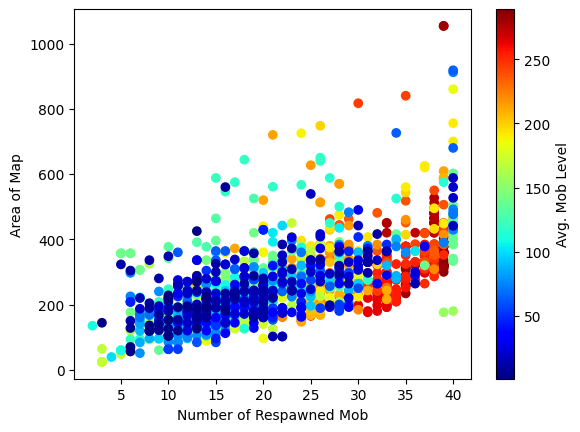

In [52]:
# visual display of relationship of area and mob capacity
plt.scatter(df_density["Cap/Gen"], df_density["Area"], c=df_density['Avg.LV'], cmap=plt.cm.jet)
plt.xlabel("Number of Respawned Mob")
plt.ylabel("Area of Map")
plt.colorbar(label="Avg. Mob Level")
plt.show()

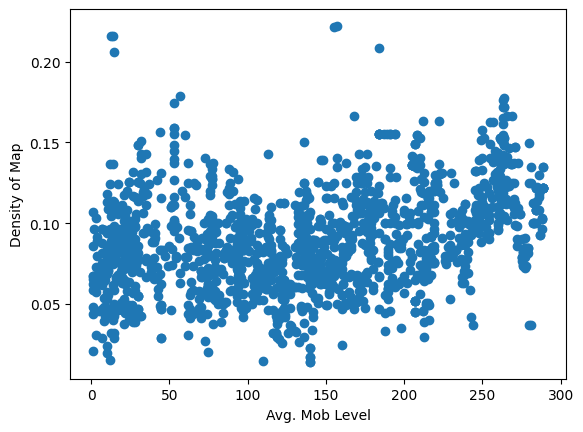

In [53]:
# visual display of densities in each level
plt.scatter(df_density['Avg.LV'], df_density['Density'])
plt.xlabel("Avg. Mob Level")
plt.ylabel("Density of Map")
plt.show()

In [54]:
# sample finding density range
def top_density_level_range(low, high):
  data_range = df_density[df_density['Avg.LV'].isin(range(low, high+1))]
  return data_range.sort_values(by="Density", ascending=False)

top_density_level_range(230, 240)

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Avg.LV,Area,Density
257,Arcana,Where Water and Sunlight Meet,28,9,33,230,252,0.130952
254,Arcana,The Forest of Earth,28,8,28,232,224,0.125000
225,Morass,Shadowdance Hall 3,33,10,37,239,330,0.112121
226,Morass,Shadowdance Hall 2,33,10,37,239,330,0.112121
239,Morass,Street Cat Area 2,32,11,38,237,352,0.107955
255,Arcana,The Forest of Sunlight,28,9,27,231,252,0.107143
244,Morass,Path to the Coral Forest 3,26,14,38,236,364,0.104396
247,Arcana,The Volatile and Toxic Forest 2,33,9,31,235,297,0.104377
234,Arcana,The Deepest Part of the Cavern - Lower Path,25,11,28,238,275,0.101818
238,Morass,Street Cat Area,32,12,39,237,384,0.101562


In [64]:
# sample of creating a score comparing 2 factors
# weighted factors
weighted_density = 3
weighted_factor = 1

def find_score(density, factor):
  return (weighted_density*density)/(weighted_factor*factor)

# example total area size
df_density['Score'] = list(map(find_score, df_density['Density'], df_density['Area']))


In [74]:
# search for the top map from score and chosen factor
# pref is if high or low value is preferred
def top_map_level_range(low, high, factor, pref):
  df_density['Score'] = list(map(find_score, df_density['Density'], df_density[factor]))
  data_range = df_density[df_density['Avg.LV'].isin(range(low, high+1))]
  if (pref == 'high'):
    return data_range.sort_values(by="Score", ascending=True)
  return data_range.sort_values(by="Score", ascending=False)

In [75]:
# example by area
top_map_level_range(230, 240, 'Area', "low").head(5)

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Avg.LV,Area,Density,Score
254,Arcana,The Forest of Earth,28,8,28,232,224,0.125000,0.001674
257,Arcana,Where Water and Sunlight Meet,28,9,33,230,252,0.130952,0.001559
253,Arcana,Between Frost and Thunder 2,33,6,20,233,198,0.101010,0.001530
255,Arcana,The Forest of Sunlight,28,9,27,231,252,0.107143,0.001276
234,Arcana,The Deepest Part of the Cavern - Lower Path,25,11,28,238,275,0.101818,0.001111


In [76]:
# example by height (for the vertically challenged classes)
top_map_level_range(230, 240, 'H(1/100)', "low").head(5)

,Zone,Map Name,W(1/100),H(1/100),Cap/Gen,Avg.LV,Area,Density,Score
253,Arcana,Between Frost and Thunder 2,33,6,20,233,198,0.101010,0.050505
254,Arcana,The Forest of Earth,28,8,28,232,224,0.125000,0.046875
257,Arcana,Where Water and Sunlight Meet,28,9,33,230,252,0.130952,0.043651
246,Arcana,The Volatile Forest,34,8,27,236,272,0.099265,0.037224
255,Arcana,The Forest of Sunlight,28,9,27,231,252,0.107143,0.035714
